# Logistic Regression 

Logistic regression is a statistical method used for binary classification, which means it is used to predict the probability of an event occurring or not. It is a type of generalized linear model that is used when the dependent variable is binary or categorical.

In logistic regression, the dependent variable is binary (i.e., it can take on one of two values, usually 0 or 1), and the independent variables can be either continuous or categorical. The goal of logistic regression is to find the relationship between the independent variables and the dependent variable by estimating the probability of the dependent variable being 1 given the values of the independent variables.

The logistic regression model uses a logistic function (also known as the sigmoid function) to map the input values of the independent variables to a value between 0 and 1, which represents the probability of the dependent variable being 1. The logistic function is defined as:

css
Copy code
p = 1 / (1 + e^(-z))
where p is the predicted probability of the dependent variable being 1, e is the base of the natural logarithm, and z is the linear combination of the independent variables.

The logistic regression model estimates the values of the coefficients of the independent variables that maximize the likelihood of observing the data given the model. This is typically done using maximum likelihood estimation or gradient descent optimization.

Once the model is trained, it can be used to make predictions on new data by inputting the values of the independent variables into the logistic function and obtaining the predicted probability of the dependent variable being 1. The model can then classify the new observation as 1 or 0 based on a threshold probability value that is chosen by the user.

Logistic function: $eta(t) = 1/(1+exp(-t))$

Cost function of Logistic Regression (log loss): $-1/m*\sum(y*log(p)+(1-y)*log(1-p))$

Logistic Regression cost function partial derivatives: $1/m*X^T.(eta(X.W)-y)$

**Need to scale data first**

## Code 
 Here's an example implementation using gradient descent optimization:

In [2]:
import numpy as np

class LogisticRegression:
    
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        # initialize weights and bias to zeros
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # gradient descent optimization
        for i in range(self.n_iters):
            # calculate predicted probabilities and cost
            z = np.dot(X, self.weights) + self.bias
            y_pred = self._sigmoid(z)
            cost = (-1 / n_samples) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
            
            # calculate gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)
            
            # update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
    def predict(self, X):
        # calculate predicted probabilities
        z = np.dot(X, self.weights) + self.bias
        y_pred = self._sigmoid(z)
        # convert probabilities to binary predictions
        return np.round(y_pred).astype(int)
    
    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))


### sklearn

In [22]:
import sklearn

In [29]:
### using sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)

In [39]:
X = iris.data.values
y = iris.target.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model=LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [41]:
model.coef_

array([[-0.94560137,  1.02098021, -1.72319784, -1.59312732],
       [ 0.45723167, -0.33237119, -0.20901134, -0.70305362],
       [ 0.4883697 , -0.68860901,  1.93220918,  2.29618095]])

In [44]:
model.score(X_test, y_test)

0.98

In [45]:
model.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

#### <span style="color:red">**How to use one hot encoder!**</span>

In [46]:
from sklearn.preprocessing import OneHotEncoder

In [83]:
encoder = OneHotEncoder(sparse_output=False)
encoder.fit_transform(np.array(np.matrix(y_train).T))

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0

In [40]:
LogisticRegression?

Init signature:
LogisticRegression(
    penalty='l2',
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)
Docstring:     
Logistic Regression (aka logit, MaxEnt) classifier.

In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
scheme if the 'multi_class' option is set to 'ovr', and uses the
cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
(Currently the 'multinomial' option is supported only by the 'lbfgs',
'sag', 'saga' and 'newton-cg' solvers.)

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
that regularization is applied by default**. It can handle both dense
and sparse input. Use C-ordered arrays or CSR matrices containi

### Test 

In [3]:
# create sample dataset
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])
y = np.array([0, 0, 1, 1, 1])

# initialize logistic regression model
lr = LogisticRegression()

# train model on sample dataset
lr.fit(X, y)

# make predictions on new data
X_new = np.array([[6, 7], [7, 8]])
y_pred = lr.predict(X_new)

print(y_pred)  # [1, 1]

[1 1]


### Improvements 
here are some possible improvements you could make to the code:

1. Add regularization: Regularization can help prevent overfitting and improve the generalization performance of the model. You could add L1 or L2 regularization to the cost function and adjust the regularization strength with a hyperparameter. Here's an example of how to add L2 regularization to the code:

2. Use a more sophisticated optimization algorithm: Gradient descent is a simple and effective optimization algorithm, but it may not be the most efficient or accurate for large or complex datasets. You could try using a more sophisticated algorithm, such as stochastic gradient descent (SGD), mini-batch SGD, or Adam, which can converge faster and find better optima. Here's an example of how to use mini-batch SGD:

In [84]:
?np.random.choice

Docstring:
choice(a, size=None, replace=True, p=None)

Generates a random sample from a given 1-D array

.. versionadded:: 1.7.0

.. note::
    New code should use the `~numpy.random.Generator.choice`
    method of a `~numpy.random.Generator` instance instead;
    please see the :ref:`random-quick-start`.

Parameters
----------
a : 1-D array-like or int
    If an ndarray, a random sample is generated from its elements.
    If an int, the random sample is generated as if it were ``np.arange(a)``
size : int or tuple of ints, optional
    Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
    ``m * n * k`` samples are drawn.  Default is None, in which case a
    single value is returned.
replace : boolean, optional
    Whether the sample is with or without replacement. Default is True,
    meaning that a value of ``a`` can be selected multiple times.
p : 1-D array-like, optional
    The probabilities associated with each entry in a.
    If not given, the sample assumes a unif

In [9]:
import numpy as np

class LogisticRegression:
    
    def __init__(self, learning_rate=0.01, n_iters=1000, regularization='l2', reg_strength=0.1, batch_size=32):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.regularization = regularization
        self.reg_strength = reg_strength
        self.batch_size = batch_size
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        n_batches = n_samples // self.batch_size
        for i in range(self.n_iters):
            batch_indices = np.random.choice(n_samples, self.batch_size)
            X_batch = X[batch_indices]
            y_batch = y[batch_indices]
            z = np.dot(X_batch, self.weights) + self.bias
            y_pred = self._sigmoid(z)
            cost = (-1 / self.batch_size) * np.sum(y_batch * np.log(y_pred) + (1 - y_batch) * np.log(1 - y_pred))
            if self.regularization == 'l2':
                reg_cost = (self.reg_strength / (2 * n_samples)) * np.sum(self.weights ** 2)
                cost += reg_cost
            elif self.regularization == 'l1':
                reg_cost = (self.reg_strength / (2 * n_samples)) * np.sum(np.abs(self.weights))
                cost += reg_cost
            dw = (1 / self.batch_size) * np.dot(X_batch.T, (y_pred - y_batch))
            db = (1 / self.batch_size) * np.sum(y_pred - y_batch)
            if self.regularization == 'l2':
                dw += (self.reg_strength / n_samples) * self.weights
            elif self.regularization == 'l1':
                dw += (self.reg_strength / n_samples) * np.sign(self.weights)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_pred = self._sigmoid(z)
        return np.round(y_pred).astype(int)

This implementation includes the following improvements:

1. Regularization: You can choose between L1 or L2 regularization by setting the regularization parameter to either 'l1' or 'l2', and adjust the regularization strength with the reg_strength parameter.

2. Mini-batch stochastic gradient descent: The model uses mini-batch SGD (instead of simple gradient descent) to update the weights and bias, which can converge faster and find better optima.


### Test 

In [10]:
# create sample dataset
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])
y = np.array([0, 0, 1, 1, 1])

# initialize logistic regression model
lr = LogisticRegression(learning_rate=0.01, n_iters=1000, regularization='l2', reg_strength=0.1, batch_size=2)

# train model on sample dataset
lr.fit(X, y)

# make predictions on new data
X_new = np.array([[6, 7], [7, 8]])
y_pred = lr.predict(X_new)

print(y_pred)  # [1, 1]


[1 1]


## Visualize 

It is difficult to visualize logistic regression since it is a high-dimensional problem. However, we can visualize the decision boundary of a logistic regression model for a two-dimensional dataset.

Here's an example of how to visualize the decision boundary of the LogisticRegression class on a 2D dataset using the matplotlib library:

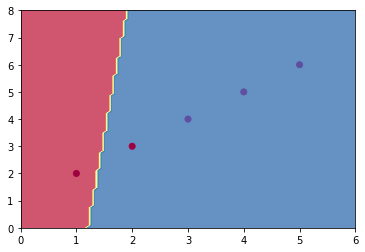

In [11]:
import matplotlib.pyplot as plt

# create 2D dataset
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])
y = np.array([0, 0, 1, 1, 1])

# initialize logistic regression model
lr = LogisticRegression(learning_rate=0.01, n_iters=1000, regularization='l2', reg_strength=0.1, batch_size=2)

# train model on dataset
lr.fit(X, y)

# plot decision boundary
x1 = np.linspace(0, 6, 100)
x2 = np.linspace(0, 8, 100)
xx, yy = np.meshgrid(x1, x2)
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)

# plot data points
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Spectral)

plt.show()

# Softmax Regression

single output multiclass regression and classes have to be mutually exclusive

softmax function: $p_k = exp(s_k(x))/\sum(exp_{j=1}^K(s_j(x))), s_k(x)=(W^{(k)})^T.x$

softmax cost function **Cross Entropy**: $-\dfrac{1}{m} \sum_i \sum_k y_k^i*log(p_k^i)$

partial derivatives of Cross Entropy: $1/m*X^T.(eta(X.W)-Y)$


### Batch gradient descent with early stopping for Softmax Regression

In [8]:
# Batch gradient descent with early stopping for Softmax Regression
import numpy as np

class SoftmaxRegressionGD:
    def __init__(self, n_iter, early_stop_n_iter, lr, regul):
        self.W = None
        self.lr = lr
        self.regul = regul
        self.n_iter = n_iter
        self.best_error = float("inf")
        self.best_w = None
        self.early_stop_n_iter = early_stop_n_iter
    
    def _softmax(self, s):
        exp = np.exp(s)
        exp_d = np.sum(np.exp(s), axis=1, keepdims=True)
        return exp/exp_d

    def _centropy_error(self, p, y):
        return -1/y.shape[0]*np.sum(y*np.log(p))
        
    def _centory_gradient(self,x,p,y):
        return 1/y.shape[0]*x.T@(p-y)
        
    def fit(self, X, y, X_val, y_val):
        m,n = X.shape
        k = y.shape[1]
        # X->[1,X]
        X = np.hstack([np.zeros((m,1)),X])
        X_val = np.hstack([np.zeros((m,1)),X_val])
        
        # initiate W
        self.W = np.zeros([n+1,k])
        
        for epoch in range(self.n_iter):
            p = self._softmax(X@self.W)
            p_val = self._softmax(X_val@self.W)
            gradient = self._centory_gradient(X, p, y)
            gradient_l2 = np.r_[np.zeros([1,k]),2*self.regul*self.W[1:]]
            self.W = self.W - self.lr*(gradient+gradient_l2)
            error = self._centropy_error(p_val, y_val)
            if error<=self.best_error:
                self.best_error = error
                self.best_w = self.W
                early_stop_n_iters = 1
            else:
                early_stop_n_iters+=1
                if early_stop_n_iters>=self.early_stop_n_iter:
                    self.W = self.best_w
                    break

    def pred(self, X):
        # X->[1,X]
        X = np.hstack([np.zeros((len(y),1)),X])
        y_pred = self._softmax(X@self.W)
        return y_pred
    

In [87]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [88]:
iris= load_iris(as_frame=True)

In [ ]:
OneHotEncoder

### using sklearn

In [13]:
### using sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris(as_frame=True)

In [15]:
# Load the data
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
model.fit(X_train, y_train)

print("Training set accuracy:", model.score(X_train, y_train))
print("Test set accuracy:", model.score(X_test, y_test))

Training set accuracy: 0.95
Test set accuracy: 1.0


In [14]:
LogisticRegression?

Init signature:
LogisticRegression(
    penalty='l2',
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)
Docstring:     
Logistic Regression (aka logit, MaxEnt) classifier.

In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
scheme if the 'multi_class' option is set to 'ovr', and uses the
cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
(Currently the 'multinomial' option is supported only by the 'lbfgs',
'sag', 'saga' and 'newton-cg' solvers.)

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
that regularization is applied by default**. It can handle both dense
and sparse input. Use C-ordered arrays or CSR matrices containi

### test

# Measurement

## Cross validation

In [ ]:
# sklearn cross validation
from sklearn.model_selection import cross_val_score, cross_val_predict
cross_val_score(model, x, y, cv=3, scoring='accuracy')
cross_val_predict(model, x, y, cv=3)

# stratified sampling
from sklearn.model_selection import StratifiedKFold
skfolds = StratifiedKFold(n_split=3, random_State=42)

for train_idx, test_idx in skfolds.split(X_train, y_train):
    df_x_train, df_y_train, df_x_test, df_y_test

    clone_m = sklearn.base.clone(classifier)
    clone_m.fit(df_x_train, df_y_train)
    df_y_pred = clone_m.predict(df_x_test)

    # measure
    # accuracy: sum(df_y_pred==df_y_test)/len(y_test)
    
    tp = np.sum([1 if y_p[i]==1 and y_t[i]==1 else 0 for i in range(len(y_test))])
    tp = np.sum(np.all([y_p[i]==1,y_t[i]==1], axis=0))
    # precision(binary):
    tp/sum(y_pred)
    # recall
    tp/sum(y_test)

# self-implemented cross validation
np.random.choice(y,0.8*len(y), replace=False)
np.random.permutation(y, random_state)

## Precision or Recall(TPR)

In [ ]:
When False Positive cost is high, prefer higher precision: TP/(TP+FP)
When false negative cost is high, prefer higher recall(TPR): TP/(TP+FN)

Decide the optimal threshold based on precision recall curve and Precision VS. Recall curve: threshold on function scores(X.W)

## ROC (TPR VS. FPR)

<span style="color:red">**when positive instances are rare or you care more about false positives than false negatives, PR curve is preferred than POC**</span>